In [1]:
# make the complete cross section
import numpy as np
import matplotlib.pyplot as plt

## final project closing step: **complete cross section**

In [3]:
def cross_section(interfaces,velocities,magma_xz,hydro_xz=None,other_xz=None):
    ########## FUNCTION DETAILS: PLEASE READ #################################################################################
    # interfaces = array of interface depths as positive values, [meters]                                                    #
    # velocities = list of strings of layer P wave velocities, [m/s]                                                         #
    #                                                                                                                        #
    # magma_xz = list of [x_min, x_max, z_min, z_max] from gravity & magnetic blocks for any magma chambers, [meters]        #
    # hydro_xz = list of [x_min, x_max, z_min, z_max] from gravity & magnetic blocks for any hydrothermal features, [meters] #
    # other_xz = list of [x_min, x_max, z_min, z_max] from gravity & magnetic blocks for any other features, [meters]        #
    #                                                                                                                        #
    # some of you won't have any hydrothermal features, and most of you won't have any 'other' features, but the magma       #
    # chambers are REQUIRED-- you all have at least one magma chamber, and it needs to go on the plot!!!                     #
    #                                                                                                                        #
    # ^^^^^^^^^^^^^^^^^^^^^ PLEASE READ AND RESPECT THE TYPES OF INPUTS (OR YOU WILL HAVE TERRIBLE ERRORS) ^^^^^^^^^^^^^^^^^ #
    ##########################################################################################################################
    
    # check the lengths of velocities (list) and interface depths (array) please:
    if len(velocities)==len(interfaces)+1:
        print('Making the plot now...')
    else:
        print("I can't plot this! Fix length of array and/or list to match: len(interface depths) = n, len(velocities) = n+1.")
        return None

    # Define the parameters
    distance   = np.linspace(0,50000,1000)    # x distance across the volcano [m]
    surface    = np.zeros_like(distance)      # surface vector
    basement   = surface - 20000              # lower bound for the plot
    receiver_x = np.linspace(0,50000,100)     # receiver spacing
    receiver_y = 190*np.ones_like(receiver_x) # you need a y vector to plot the x vector

    interfaces = np.abs(interfaces)           # in case you forget to make the interface depths POSITIVE, I fix it for you

    layers       = np.zeros([len(interfaces)+2,len(distance)]) # initializing layers for plotting by # of input interfaces
    layers[0,:]  = surface                                     # first layer starts at the surface
    layers[-1,:] = basement                                    # last layer ends with lower bound of plot
    for i in range(len(interfaces)):
        layers[i+1,:] = surface - interfaces[i]                # fill middle with the input interfaces (from YOU, dear reader)

    # colors for plotting the layers
    c_list = plt.cm.viridis_r(np.linspace(0,1,len(interfaces)+2))

    # magma chambers:
    magma_xz = np.array(magma_xz)            # make it into an array
    x0_m = magma_xz[:,0]                     # x_mins for magma chambers, [m]
    z0_m = -1*np.abs(magma_xz[:,2])          # z_mins for magma chambers, [m]
    h_m  = -1*(np.abs(magma_xz[:,3]) + z0_m) # heights for magma chambers, [m]
    w_m  = magma_xz[:,1] - x0_m              # widths for magma chambers, [m]

    # hydrothermal features:
    hydro_xz = np.array(hydro_xz)                # make it into an array
    if hydro_xz.any() != None:
        x0_h = hydro_xz[:,0]                     # x_mins for hydrothermal features, [m]
        z0_h = -1*np.abs(hydro_xz[:,2])          # z_mins for hydrothermal features, [m]
        h_h  = -1*(np.abs(hydro_xz[:,3]) + z0_h) # heights for hydrothermal features, [m]
        w_h  = hydro_xz[:,1] - x0_h              # widths for hydrothermal features, [m]

    # other features:
    other_xz = np.array(other_xz)                # make it into an array
    if other_xz.any() != None:
        x0_o = other_xz[:,0]                     # x_mins for other features, [m]
        z0_o = -1*np.abs(other_xz[:,2])          # z_mins for other features, [m]
        h_o  = -1*(np.abs(other_xz[:,3]) + z0_o) # heights for other features, [m]
        w_o  = other_xz[:,1] - x0_o              # widths for other features, [m]

    body_labels = 0
    
    # now actually make the figure (don't worry about it):
    plt.figure(figsize=(15,6),dpi=300)
    for i in range(len(interfaces)+1):
        plt.fill_between(distance,layers[i,:],layers[i+1,:],where=layers[i,:]>layers[i+1,:],color=c_list[i],label=velocities[i])
    for i in range(1,len(interfaces)+1):
        plt.plot(distance,layers[i],color='black',linestyle='--')
        
    for i in range(magma_xz.shape[0]):
        chamber = plt.Rectangle((x0_m[i],z0_m[i]), w_m[i], h_m[i], fc='tomato',ec='lightsalmon',hatch='.')
        plt.gca().add_artist(chamber)
        body_labels += 1
        centerc = chamber.get_center()
        plt.text(centerc[0]-250,centerc[1],s=f'{body_labels}',color='darkred',fontsize=13,fontweight='bold')
        
    if hydro_xz.any() != None:
        for i in range(hydro_xz.shape[0]):
            hydro_feature = plt.Rectangle((x0_h[i],z0_h[i]), w_h[i], h_h[i], fc='lightcyan',ec='skyblue',hatch='x')
            plt.gca().add_artist(hydro_feature)
            body_labels += 1
            centerh = hydro_feature.get_center()
            plt.text(centerh[0]-250,centerh[1],s=f'{body_labels}',color='darkblue',fontsize=13,fontweight='bold')
            
    if other_xz.any() != None:
        for i in range(other_xz.shape[0]):
            other_feature = plt.Rectangle((x0_o[i],z0_o[i]), w_o[i], h_o[i], fc='gray',ec='darkgray',hatch='/')
            plt.gca().add_artist(other_feature)
            body_labels += 1
            centero = other_feature.get_center()
            plt.text(centero[0]-250,centero[1],s=f'{body_labels}',color='black',fontsize=13,fontweight='bold')
            
    plt.plot(distance,surface,color='black')
    plt.plot(25000*np.ones(250), np.linspace(1000,-20001,250),linestyle=':',linewidth=3,color='white',alpha=0.8) # x coord of peak
    plt.scatter(25000,490,marker='^',s=270,color='brown')         # tiny 'volcano' peak 
    plt.scatter(receiver_x,receiver_y,marker='^', color='black')  # receivers
    plt.ylim(-20000,1000)
    plt.xlim(0,50000)
    plt.xlabel('Distance [m]',fontsize=14)
    plt.ylabel('Depth [m]',fontsize=14)
    plt.legend(fontsize=10)
    plt.savefig('my-complete-cross-section.png', bbox_inches='tight')
    plt.show();

## example function use for default volcano:

In [7]:
# define array of interface depths:
int_default = np.array([305, 2186, 4995, 8066]) # interface depths in meters

# define list of velocities (include units):
vel_default = ['v1 = 2700 m/s', 'v2 = 3780 m/s', 'v3 = 4717 m/s', 'v4 = 5396 m/s', 'v5 = 6250 m/s']

##############################################################################################
#  NB: velocity list should be of length n+1, for n = length of array of interface depths,   #
#  and the plotting function will accommodate any length of interface array as long as the   #
#  length of the velocity list follows the rule above. :)                                    #
##############################################################################################

# check that you are following the rule above:
print('length of array of interface depths = ', len(int_default), " = n")
print('length of list of velocities        = ', len(vel_default), " = n+1")

length of array of interface depths =  4  = n
length of list of velocities        =  5  = n+1


In [13]:
# define list for possible magma chambers (need double brackets even if there's only one chamber):
magma_default = [[28000, 43000, -14000, -2000], # (x_min, x_max, z_min, z_max) for CHAMBER 1
               [17000, 27000, -10000, -6000]]   # (x_min, x_max, z_min, z_max) for CHAMBER 2

# define list for possible hydrothermal features (NOTE THE DOUBLE BRACKETS HERE):
hydro_default = [[18000, 25000, -800, -100],    # (x_min, x_max, z_min, z_max) for HYDROTHERMAL FEATURE 1
                 [30000, 40000, -600, -200]]    

# define list for possible other features (need double brackets even if there's only one feature):
other_default = [[14000, 18000, -4000, -1500],  # (x_min, x_max, z_min, z_max) for OTHER FEATURE 1
                [30000, 48000, -9500, -2500]]   # (x_min, x_max, z_min, z_max) for OTHER FEATURE 2

Making the plot now...


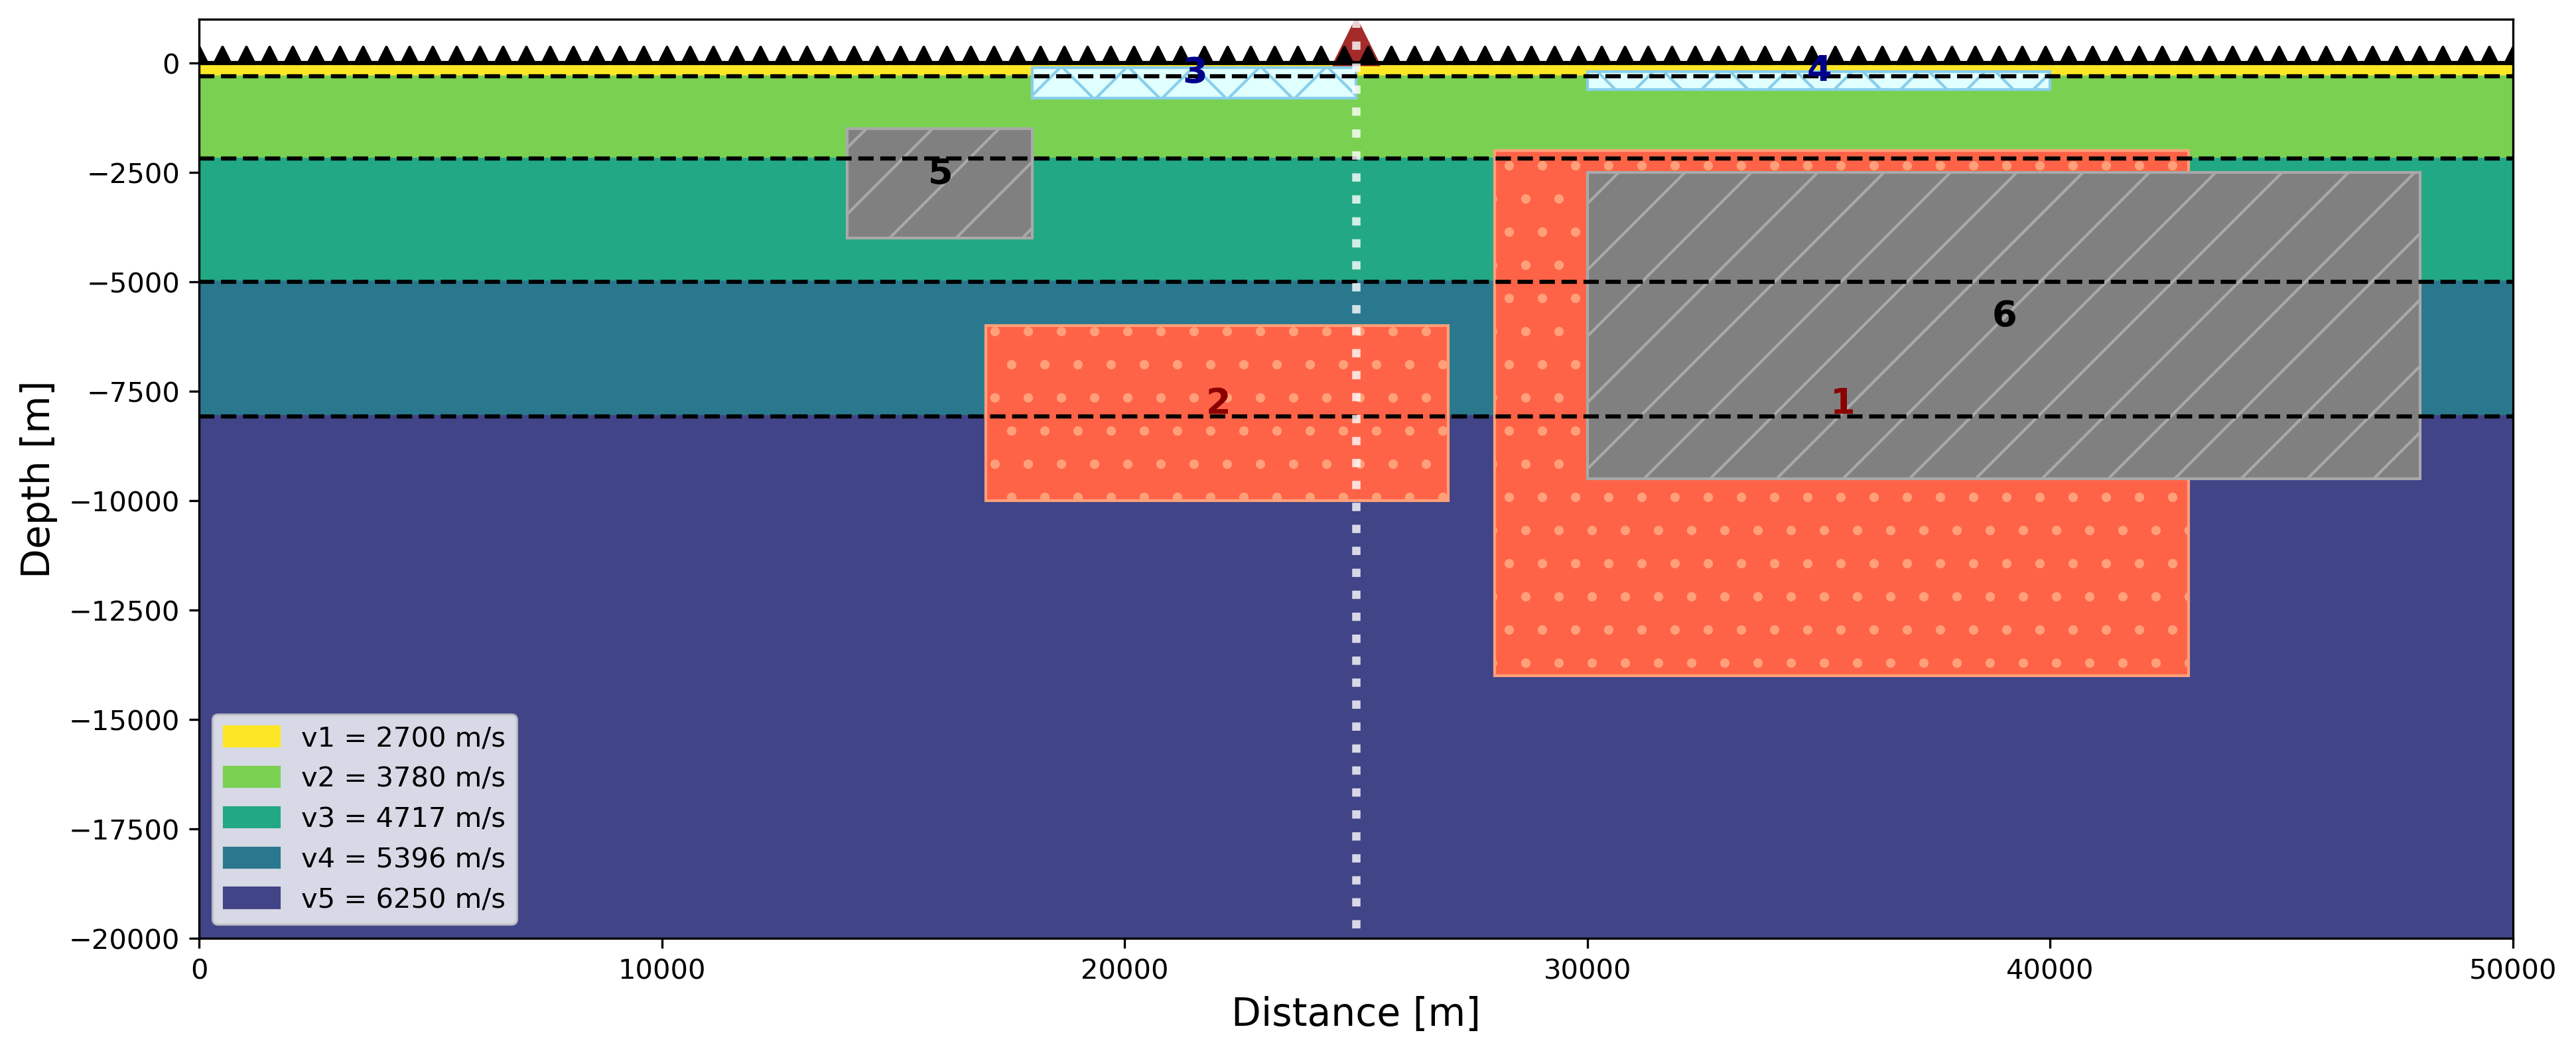

In [15]:
# actually make the plot:
default_plot = cross_section(int_default,vel_default,magma_default,hydro_default,other_default)

Making the plot now...


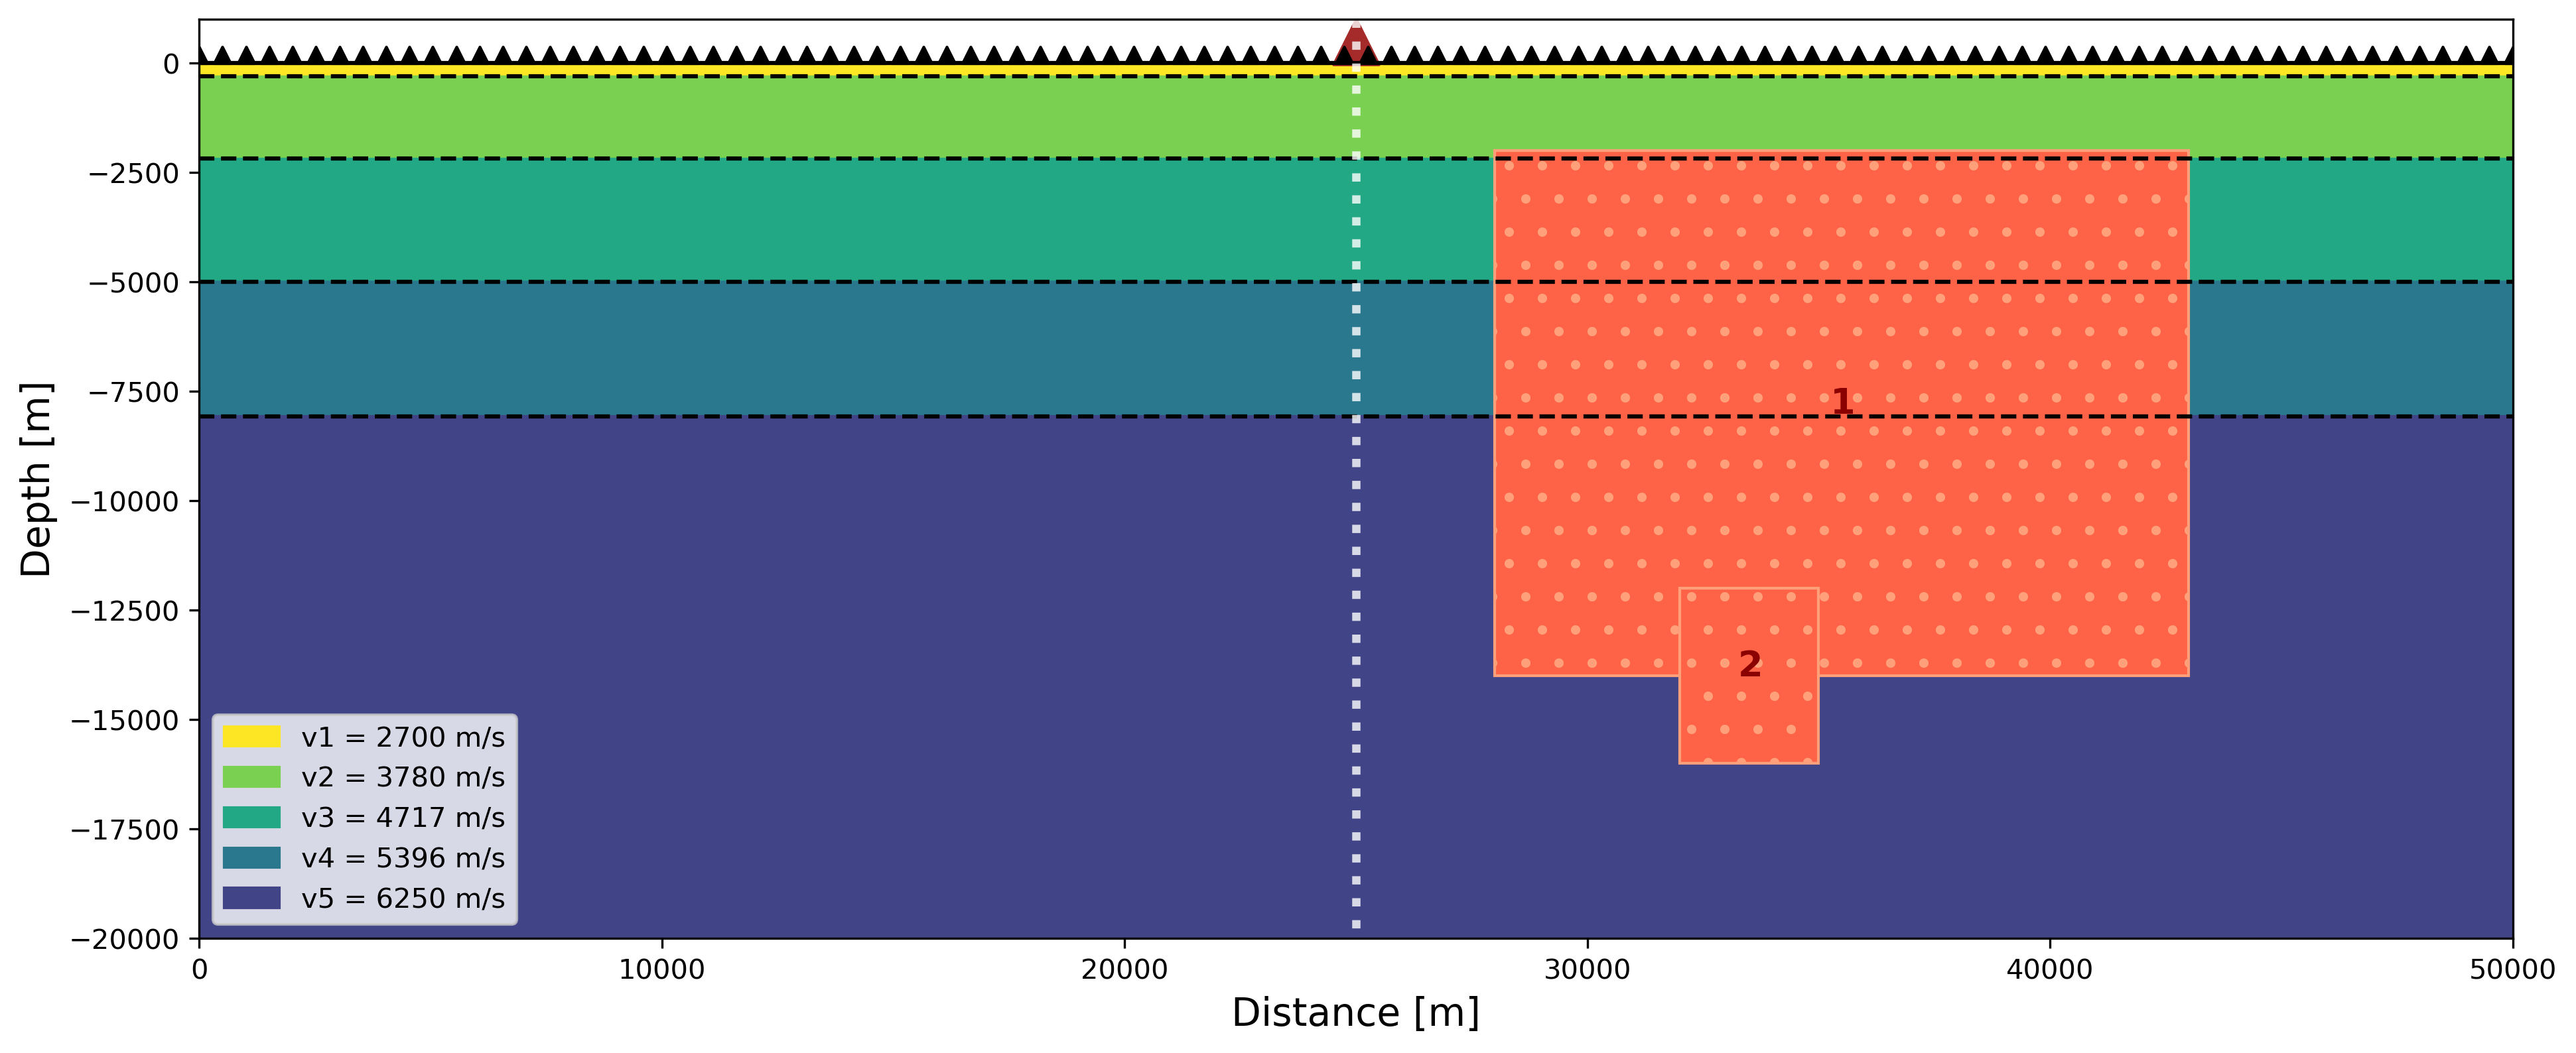

In [23]:
# if you don't have any hydrothermal features, just leave it out of the function input
# same for other features, e.g.:

default_plot = cross_section(int_default,vel_default,magma_default)

#      --> hydro_xz and other_xz are OPTIONAL inputs <--